In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('gbm-data.csv')
data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = data.drop(['Activity'], axis=1).values
y = data['Activity'].values
X


array([[0.        , 0.49700901, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.36666667, 0.60629148, 0.05      , ..., 0.        , 1.        ,
        0.        ],
       [0.0333    , 0.48012427, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.52056377, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1       , 0.7656462 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13333333, 0.53395198, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=241)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

lr = [1, 0.5, 0.3, 0.2, 0.1]
trainloglosses = {1:[], 0.5:[], 0.3:[], 0.2:[], 0.1:[]} 
testloglosses = {1:[], 0.5:[], 0.3:[], 0.2:[], 0.1:[]}

for i in lr:
    gbc = GradientBoostingClassifier(learning_rate=i, n_estimators=250, verbose=True, random_state=241)
    gbc.fit(X_train, y_train)
    
    for k, y_pred_train in enumerate(gbc.staged_predict_proba(X_train)):
        trainloglosses[i].append(log_loss(y_train, y_pred_train))
    for k, y_pred_test in enumerate(gbc.staged_predict_proba(X_test)):
        testloglosses[i].append(log_loss(y_test, y_pred_test)) 

      Iter       Train Loss   Remaining Time 
         1           1.0190           11.70s
         2           0.9192           13.27s
         3           0.8272           12.93s
         4           0.7834           12.49s
         5           0.7109           12.84s
         6           0.6368           12.89s
         7           0.5797           12.50s
         8           0.5610           11.83s
         9           0.5185           11.52s
        10           0.4984           11.14s
        20           0.1999           10.29s
        30           0.1313            9.09s
        40           0.0790            8.44s
        50           0.0511            7.86s
        60           0.0352            7.34s
        70           0.0245            6.96s
        80           0.0162            6.63s
        90           0.0114            6.22s
       100           0.0077            5.76s
       200           0.0004            1.70s
      Iter       Train Loss   Remaining Time 
        

In [30]:
trainloglosses

{1: [0.5094757697743585,
  0.4595852061738727,
  0.4135807893105015,
  0.3916829065353656,
  0.35543321895935137,
  0.3184112411385682,
  0.28985660908390926,
  0.28051806276178765,
  0.2592358848576108,
  0.24918710235518612,
  0.23251700305082681,
  0.21275437696545707,
  0.1836028438880847,
  0.16573219603499123,
  0.15262877885031242,
  0.14121090470162947,
  0.1264815312015293,
  0.11928022462364428,
  0.11381875417456198,
  0.0999510515900408,
  0.09827783500900075,
  0.0961645468690156,
  0.09482507498629338,
  0.09065093123034683,
  0.0882863272590959,
  0.08130669888344524,
  0.07534263647535694,
  0.07308391162693373,
  0.06866188233072068,
  0.06562534561822422,
  0.06380174144194087,
  0.05955353151972528,
  0.055903404098669424,
  0.05275173011592301,
  0.050667358353015536,
  0.048969064605535094,
  0.04598361705230669,
  0.044064590192304964,
  0.04229909144475057,
  0.039505782140821954,
  0.03600078883429754,
  0.03510641803184036,
  0.03432881093461523,
  0.0335773212

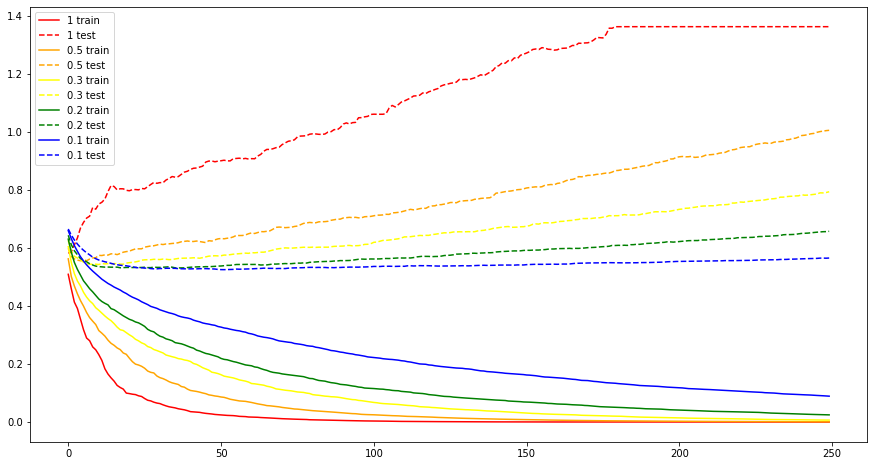

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
[1, 0.5, 0.3, 0.2, 0.1]
plt.figure(figsize=(15,8))
for name, color in [(1,'red'), (0.5,'orange'), (0.3,'yellow'), (0.2,'green'), (0.1,'blue')]:
    plt.plot(trainloglosses[name], color = color, label = str(name)+' train')
    plt.plot(testloglosses[name], color = color, linestyle = 'dashed', label = str(name)+' test')
plt.legend(loc='upper left')
plt.show()

In [35]:
testloglosses = pd.DataFrame.from_dict(testloglosses)
testloglosses

,1.0,0.5,0.3,0.2,0.1
0,0.582294,0.598784,0.625706,0.644018,0.665666
1,0.586915,0.570690,0.589778,0.611680,0.644785
2,0.610679,0.562520,0.571306,0.590484,0.627848
3,0.634867,0.558294,0.565743,0.576736,0.613776
4,0.668921,0.556239,0.558807,0.563464,0.601769
...,...,...,...,...,...
245,1.363092,0.998907,0.786222,0.654644,0.564370
246,1.363092,1.001457,0.790188,0.655624,0.565223
247,1.363092,1.002929,0.790055,0.656328,0.565329
248,1.363092,1.004800,0.791359,0.656614,0.564976


In [50]:
testloglosses[0.2].min()

0.5314949511258739

In [51]:
testloglosses[testloglosses.eq(0.5314949511258739).any(1)]

,1.0,0.5,0.3,0.2,0.1
36,0.846283,0.618396,0.564149,0.531495,0.529066


In [39]:
testloglosses.idxmin(axis=0, skipna=True)

1.0     0
0.5     6
0.3    10
0.2    36
0.1    51
dtype: int64

In [43]:
low = []
low.append(testloglosses[1.0].iloc[0])
low.append(testloglosses[0.5].iloc[6])
low.append(testloglosses[0.3].iloc[10]) 
low.append(testloglosses[0.2].iloc[36]) 
low.append(testloglosses[0.1].iloc[51])

min(low)

0.5254924770369842

In [44]:
testloglosses[testloglosses.eq(0.5254924770369842).any(1)]

,1.0,0.5,0.3,0.2,0.1
51,0.90277,0.631926,0.57573,0.539265,0.525492


In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=241, n_estimators=51)
rf.fit(X_train, y_train)
pred = rf.predict_proba(X_test)

In [54]:
log_loss(y_test, pred)

0.5390618347947492